In [1]:
%matplotlib inline

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, bernoulli, beta

# Chapter 3 - Generative Models

This chapter introduces learning from a bayesian perspective, giving some simple examples and showing how Naive Bayes relies on this kind of theory.

## Bayesian concept learning

We can model learning behavior by introducing a hypothesis space $\mathcal{H}$ and, based on a dataset $\mathcal{D}$ we review our belief in $h\in\mathcal{H}$. This update is done by using Bayes rule.

### Likelihood

The likelihood $p(\mathcal{D}|h)$ represents how probable is to get the data $\mathcal{D}$ uder the hypothesis $h$. We want want to avoid suspicious coincidences, so we want models with high likelihood values for our data. Simply using the $h$ with highest likelihhod is called the **maximum likelihood estimate** (or **MLE**).

### Prior

Maybe we also want to encode some prior belief into a hypothesis $h$. This way, we can weight down hypothesis that are too strange but yet good to explain our data. We do this by introducing the prior probability of the hypothesis $p(h)$. This can be seen as subjective (excluding the fact that there are principled ways to choose the prior), but the final result is that, in the limit where we have too much data, the prior don't matter.

### Posterior

The posterior is the updated belief in our hypothesis given its prior and it likelihood:

$$p(h|\mathcal{D}) = \frac{p(\mathcal{D}|h)p(h)}{p(\mathcal{D})}= \frac{p(\mathcal{D}|h)p(h)}{\sum_h p(\mathcal{D}|h)p(h)}$$

But we can simplify to:

$$p(h|\mathcal{D}) \propto p(\mathcal{D}|h)p(h)$$

Simply using the hypothesis $h$ with highest posterior probability is called **maximum a posterior** (or **MAP**) estimate.

### Posterior predictive

If we want to know if a new observable $x$ satisfies our hypothesis given the data we can average through our beliefs in the values of $h$, by doing:

$$p(x \mathrm{\ satisfies\ hypothesis\ }|\mathcal{D}) = \sum_h p(x \mathrm{\ satisfies\ hypothesis\ }|h) p(h|\mathcal{D})$$

When using MAP, we simply plug $p(h|\mathcal{D})= \delta_{h_{MAP}}$ and when using MLE we plug $\delta_{h_{MLE}}$, but the bayesian way of computing this result is to perform the sum.

## Examples

We will introduce the classification problem using the bayes rule:

$$p(y = c| x,\theta) = p(x|y = c, \theta)p(y=c|\theta)$$

This is the probability of a point be of class $c$, given its features' vector $x$ and some parameter vector $\theta$. In this case, our hypothesis space will the the space of the values of $\theta$ (some parameter we would like to estimate). Again, we will find the best hypothesis, i.e. the best $\theta$, given the data $\mathcal{D}$.

### Coin

In this example we want to find the probability of a coin toss gives head given a set of observations $\mathcal{D}$. We first supose that the probability of a coin toss turns to be head is given by:

$$Ber(x|\theta)$$

That is $p(x = \mathrm{head}|\theta) = \theta$ and $p(x = \mathrm{tails}|\theta) = 1 - \theta$. For a set of observations, the likelihood is written as:

$$p(\mathcal{D}|\theta) = \theta^{N_{\mathrm{heads}}} (1 - \theta)^{N_{\mathrm{tails}}}$$

Where $N$ is the number of occurencies. The posterior is written as:

$$p(\theta|\mathcal{D}) \propto p(\mathcal{D}|\theta)p(\theta) = \theta^{N_{\mathrm{heads}}} (1 - \theta)^{N_{\mathrm{tails}}} p(\theta)$$

If we have our prior on $\theta$ is given by $Beta(x|a, b) \propto \theta^{a - 1} (1 - \theta)^{b - 1}$ the posterior will be:

$$p(\theta|\mathcal{D}) \propto Beta(\theta|N_{\mathrm{heads}} + a, N_{\mathrm{tails}} + b) \propto \theta^{N_{\mathrm{tails}} + a - 1} (1 - \theta)^{N_{\mathrm{tails}} + b - 1}$$

If the prior and the posterior have the same form, the prior is said to be **conjugated** with respect to the likelihood. If we instead had two sets of observations $\mathcal{D}'$ and $\mathcal{D}''$ we will arrive with:

$$p(\theta|\mathcal{D}', \mathcal{D}'') \propto Beta(\theta|N_{\mathrm{heads}}' + N_{\mathrm{heads}}'' + a, N_{\mathrm{tails}}' + N_{\mathrm{tails}}'' + b)$$

Therefore, the algorithm is well suited for online learning.

#### MAP

If $\theta | D \sim Ber(N_{\mathrm{heads}} + a, N_{\mathrm{tails}} + b)$, the MAP estimator of the parameter is given by:

$$\theta^{*} = \underset{\theta}{\operatorname{argmax}} p(\theta|\mathcal{D}) = \frac{N_{\mathrm{heads}} + a - 1}{N + a + b - 2}$$

where $N = N_{\mathrm{heads}} + N_{\mathrm{tails}}$

#### MLE

The MLE estimator of parameters, on the other hand, is given by:
    
$$\theta^* = \underset{\theta}{\operatorname{argmax}} p(\mathcal{D}|\theta) = \frac{N_{\mathrm{heads}}}{N}$$

#### Mean and Variance

The **mean** of $\theta$ given the data is given by:
    
$$\mathbb{E}[\theta|\mathcal{D}] = \frac{N_{\mathrm{heads}} + a}{N + a + b} = \lambda \frac{a}{a + b} + (1 - \lambda)\hat{\theta}_{\mathrm{MLE}}$$

where $\lambda = \frac{a + b}{N + a + b}$. That is, the expected value of the parameter is a convex combination of the MLE estimator and the prior mean, approaching the MLE when $N \rightarrow \infty$. Similarly, one can show that the posterior mode is a convex combination of the prior mode and the MLE, and also converges to the MLE.

The **variance** is given by:

$$\mathrm{var}[\theta|\mathcal{D}] = \frac{(N_{\mathrm{heads}} + a)(N_{\mathrm{tails}} + b)}{(N_{\mathrm{heads}} + N_{\mathrm{tails}} + a + b)^2 (N_{\mathrm{heads}} + N_{\mathrm{tails}} + a + b + 1)}$$

When $N \gg a, b$, we have:

$$\mathrm{var}[\theta|\mathcal{D}] = \frac{\hat{\theta}_{\mathrm{MLE}}(1 - \hat{\theta}_{\mathrm{MLE}})}{N}$$

So the error of the estimation of $\theta$ goes down at a rate of $\frac{1}{\sqrt{N}}$.

#### Posterior predictive

Finally, the probability of heads in a  future trial is given by:

$$p(x = \mathrm{heads}| \mathcal{D}) = \int p(x = \mathrm{heads}|\theta)p(\theta|\mathcal{D})d\theta = \int \theta\ Beta(\theta|N_{\mathrm{heads}} + a, N_{\mathrm{tails}} + b) = \mathbb{E}[\theta|\mathcal{D}] = \frac{N_{\mathrm{heads}} + a}{N + a + b}$$

If we use an uniform prior $a = b = 1$, we obtain what is called **pseudo-counts** or **add-one smoothing**, that prevents the black swan effect, in which the probability of an unseen event would be zero.

#### Example

Suppose we have a real coin which gives heads with probability $\theta = 0.7$ and tails with probability $(1 - \theta)$. Suppose now that we don't know $\theta$, but we have access to 40 trials of this coin:

In [2]:
coin = bernoulli(0.7)
samples = coin.rvs(20)
num_heads = sum(samples)
num_tails = len(samples) - num_heads

As bayesians, we model the problem as finding the parameter $\theta$ of a bernoulli distribution given the data. For this, we start with an uniform prior, since with this prior we make the least number of assumptions about $\theta$: 

In [3]:
prior_1 = beta(1,1)

The likelihood of the dataset is given by $\theta^{N_{\mathrm{heads}}} (1 - \theta)^{N_{\mathrm{tails}}} \propto Beta(\theta|N_{\mathrm{heads}} + 1, N_{\mathrm{tails}} + 1)$:

In [4]:
likelihood = beta(num_heads+1, num_tails+1)

The posterior is, therefore, the product:

$$p(\theta|\mathcal{D}) \propto Beta(\theta|N_{\mathrm{heads}} + 1, N_{\mathrm{tails}} + 1) Beta(\theta|1, 1) = Beta(\theta|N_{\mathrm{heads}} + 1, N_{\mathrm{tails}} + 1)$$

In [5]:
posterior_1 = beta(num_heads+1, num_tails+1)

If we, instead, had a prior $Beta(2, 5)$ we would have

In [6]:
prior_2 = beta(2, 5)
posterior_2 = beta(num_heads + 2, num_tails + 5)

We can see the difference between both priors in the following figure:

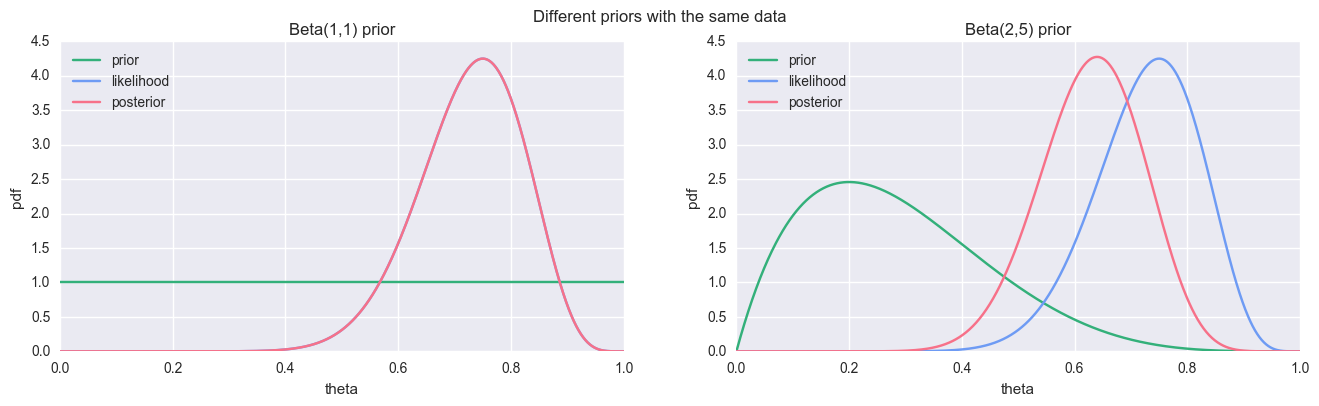

In [7]:
colors = sns.color_palette('husl', 10)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
thetas = np.linspace(0, 1, 1000)

ax[0].plot(thetas, list(map(prior_1.pdf, thetas)), color=colors[4], label='prior')
ax[0].plot(thetas, list(map(likelihood.pdf, thetas)), color=colors[7], label='likelihood')
ax[0].plot(thetas, list(map(posterior_1.pdf, thetas)), color=colors[0], label='posterior')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('theta')
ax[0].set_ylabel('pdf')
ax[0].set_title('Beta(1,1) prior')

ax[1].plot(thetas, list(map(prior_2.pdf, thetas)), color=colors[4], label='prior')
ax[1].plot(thetas, list(map(likelihood.pdf, thetas)), color=colors[7], label='likelihood')
ax[1].plot(thetas, list(map(posterior_2.pdf, thetas)), color=colors[0], label='posterior')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('theta')
ax[1].set_ylabel('pdf')
ax[1].set_title('Beta(2,5) prior')


plt.suptitle('Different priors with the same data')
plt.show()

Notice how, in both cases, the most probable value for $\theta$ is close to the real 0.7 value. We can also see that the posterior in the first case, where the prior is uniform, is equal to the likelihood. On the other hand, if our prior tends to other values of $\theta$, the posterior approaches the likelihood more slowly.

### Dice

We want to compute the probability of a dice of $K$ faces comes up with the face $k$, using a set of observations $\mathcal{D}$. A **single trial** can be written as: 

$$p(x = k|\theta) = Cat(x|\theta)$$

The **likelihood** of the data under the parameter is given, therefore, by the product:

$$p(\mathcal{D}|\theta) = \prod_k \theta_k^{N_K}$$

Where $N_k$ is the number of that came with face $k$ up. The posterior is given as:

$$p(\theta|\mathcal{D}) = p(\theta) \prod_k \theta_k^{N_K}$$

So, if we use the Dirichlet distribution, the **prior** is conjugate:

$$p(\theta) = Dir(\theta|\alpha) = \frac{1}{B(\alpha)} \sum_k \theta_k^{\alpha_k - 1} \mathbb{I}(\theta \in S_k)$$

If this is the case, the **posterior** becomes simply:

$$p(\theta|\mathcal{D}) = Dir(\theta|\alpha_1 + N_1, \dots, \alpha_K + N_K)$$

#### MAP

Using the lagrange optimization method with the restriction that $\sum_k \theta_k = 1$, we can find the $\theta$ that maximizes the posterior:

$$\hat{\theta}_{k\mathrm{MAP}} = \frac{N_k + \alpha_k - 1}{N - \alpha_0 - K}$$

where $\alpha_0 = \sum_k \alpha_k$.

#### MLE

Using the same method to find $\theta$ that maximizes the likelihood we find the MLE estimator:
    
$$\hat{\theta}_{k\mathrm{MLE}} = \frac{N_k}{N}$$

This result can be achieved by the MAP estimator when using an uniform prior $\alpha_k = 1$. 

#### Posterior predictive

Finally, we compute the probability of the next dice trial comes up with face $k$:
    
$$p(x = k|\mathcal{D}) = \int p(x = k|\theta)p(\theta|\mathcal{D})d\theta = \int d\theta_k\ p(x = k|\theta_k) \int p(\theta|\mathcal{D}) d\theta_{-k} = \int \theta_j p(\theta_j|\mathcal{D})d\theta = \mathbb{E}[\theta_j|\mathcal{D}]$$
$$\therefore p(x = k|\mathcal{D}) = \frac{\alpha_j + N_j}{\alpha_0 + N}$$

This also avoids the zero-count problem, since it adds the prior to the observations. This is even more important when we have more categories to fit.

## Naive Bayes classifier

Supose we are still working on the classification problem:
    
$$p(y = c| x, \theta) = p(x|y = c, \theta) p(\theta)$$

But this time $x$ is a feature vector of $D$ dimensions. Naive Bayes consists of assuming the **features are conditionally independent** given the class:

$$p(x|y = c, \theta) = \prod_d p(x_d|y=c, \theta_{dc})$$

In the case of $x$ being a real valued real vector, the conditional probability of each feature can be modeled by a normal distribution $p(x|y = c, \theta) = \prod_d N(x_d|\mu_{dc}, \sigma^2_{dc})$. In the case binary feature we use $Ber(x_d|\mu_{dc})$ and in the case of categorical features we use $Cat(x_d|\mu_{dc})$ where $\mu$ is a vector.

### Fitting the parameters

Now we show how to train a Naive Bayes classifier. We will see how to compute the MLE, the posterior and the MAP of this kind of model.

#### MLE

For a single data point, the likelihood  is written as:

$$p(x_i, y_i|\theta) = p(y_i|\pi) \prod_d p(x_{id}|\theta_j) = \pi_c \prod_d p(x_{id}|\theta_{dc})$$

where $c$ is the class of the given example. This is beacause $p(y_i|\pi) = Cat(y_i|\pi)$. For the example dataset $\mathcal{D}$, the log-likelihood is given by:

$$\log p(\mathcal{D}|\theta) = \sum_{c} N_c \log \pi_c + \sum_d \sum_c \sum_{i: y_i = c} \log p(x_{id}|\theta_{dc})$$

This uncouples the terms of $\pi$ and $\theta$, so we can optimize these separately. If we find $pi$ that maximizes its term, we get:

$$\hat{\pi}_{c\mathrm{MLE}} = \frac{N_c}{N}$$

If we suppose all **features are binary**, then $p(x_{id}|\theta_{dc}) = Ber(x_{id}|\theta_{dc})$. Therefore, the parameters that maximizes this term are:

$$\hat{\theta}_{dc\mathrm{MLE}} = \frac{N_{dc}}{N_c}$$

#### Posterior

If we factor our prior in terms of $\pi$ and $\theta$, we get:
    
$$p(\theta) = p(\pi)\prod_d \prod_c p(\theta_{dc})$$

If we use $p(\pi) = Dir(\pi|\theta)$ and $p(\theta_{dc}) = Beta(\theta_{dc}|\beta_0, \beta_1)$ we get a conjugate prior, that is, our posteriors becomes:

$$p(\pi|\mathcal{D}) = Dir(\pi|N_1 + \alpha_1, \dots, N_C + \alpha_C)$$
$$p(\theta_{dc}|\mathcal{D}) = Beta(\theta_{dc}|(N_c - N_{dc}) +\beta_0, N_{dc} + \beta_1)$$

Therefore:

$$p(\theta) = Dir(\pi|N_1 + \alpha_1, \dots, N_C + \alpha_C) \prod_d \prod_c Beta(\theta_{dc}|(N_c - N_{dc}) +\beta_0, N_{dc} + \beta_1)$$

The MAP estimator of the $\pi$ parameter is given by the mode of its distribution:

$$\hat{\pi}_{c\mathrm{MAP}} = \frac{\alpha_c + N_c - 1}{\alpha_0 + N- K}$$

Where the MAP estimator of the $\theta_{dc}$ parameters is:

$$\hat{\theta}_{dc\mathrm{MAP}} = \frac{(N_c - N_{dc}) + \beta_0 - 1}{ N_{c} + \beta_0 + \beta_1}$$

#### Posterior predictive

When performing predictions, we aim to compute:

$$p(y=c|x, \mathcal{D}) = p(y=c|\mathcal{D}) \prod_d p(x_d|y=c, \mathcal{D})$$

The Bayesian way to compute these probabilities is to integrate over the unknown parameters of the model:

$$p(y=c|x, \mathcal{D}) = \left(\int Cat(y = c|\pi)p(\pi|\mathcal{D}) d\pi\right) \prod_d \left(\int Ber(x_d|y=c, \theta_{dc}) p(\theta_{dc}|\mathcal{D}) d\theta_{dc}\right)$$

As we saw in the previous sessions, if $p(\pi|\mathcal{D})$ is dirichlet and $p(\theta_{dc}|\mathcal{D})$ is beta distributed, we can subtitute this integrals eaach by the mean value of the parameters:

$$p(y=c|x, \mathcal{D}) = \bar{\pi}_c \prod_d \bar{\theta}_{dc}^{\mathbb{I}(x_d = 1)} (1 - \bar{\theta}_{dc})^{\mathbb{I}(x_d = 0)}$$

where:

$$\bar{\pi}_c = \frac{N_c + \alpha_c}{N + \alpha_0}$$
$$\bar{\theta}_{dc} = \frac{N_{dc} + \beta_1}{N_c + \beta_0 + \beta_1}$$

This pseudo-counts added in both predictions result in less overfitting, showing the advantage of using the correct bayesian way of computing a prediction.

### Example: real valued features

In this example we predict the sex of a person given a vector of real valued features (height, weight and shoe size), using the Naive Bayes approach.

#### Data

In [8]:
people = pd.DataFrame([
    ['M', 6, 180, 12],
    ['M', 5.92, 190, 11],
    ['M', 5.58, 170, 12],
    ['M', 5.92, 165, 10],
    ['F', 5, 100, 6],
    ['F', 5.5, 150, 8],
    ['F', 5.42, 130, 7],
    ['F', 5.75, 150, 9]],
    columns = ['sex', 'height', 'weight', 'size']
)

In [9]:
people

,sex,height,weight,size
0,M,6.00,180,12
1,M,5.92,190,11
2,M,5.58,170,12
3,M,5.92,165,10
4,F,5.00,100,6
5,F,5.50,150,8
6,F,5.42,130,7
7,F,5.75,150,9


In [10]:
number_of_people = len(people)

#### Sex

In [11]:
mask_male = people.sex == 'M'
mask_female = people.sex == 'F'
prob_male = sum(mask_male)/number_of_people
prob_female = sum(mask_female)/number_of_people

#### Height

In [12]:
males_height = people.loc[mask_male, 'height']
males_height_dist = norm(loc=males_height.mean(), scale=males_height.std())

In [13]:
females_height = people.loc[mask_female, 'height']
females_height_dist = norm(loc=females_height.mean(), scale=females_height.std())

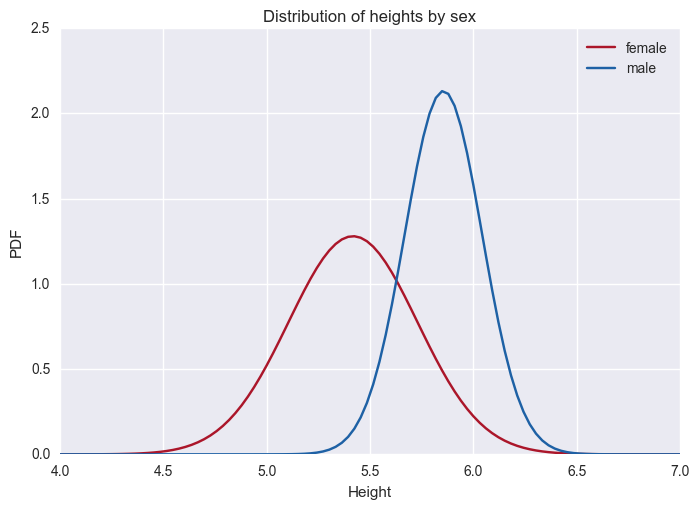

In [14]:
colors = sns.color_palette('RdBu', 10)
heights = np.linspace(4, 7, 100)
plt.plot(heights, females_height_dist.pdf(heights), label='female', color=colors[0])
plt.plot(heights, males_height_dist.pdf(heights), label='male', color=colors[-1])
plt.xlabel('Height')
plt.ylabel('PDF')
plt.title('Distribution of heights by sex')
plt.legend()
plt.show()

#### Weight

In [15]:
males_weight = people.loc[mask_male, 'weight']
males_weight_dist = norm(loc=males_weight.mean(), scale=males_weight.std())

In [16]:
females_weight = people.loc[mask_female, 'weight']
females_weight_dist = norm(loc=females_weight.mean(), scale=females_weight.std())

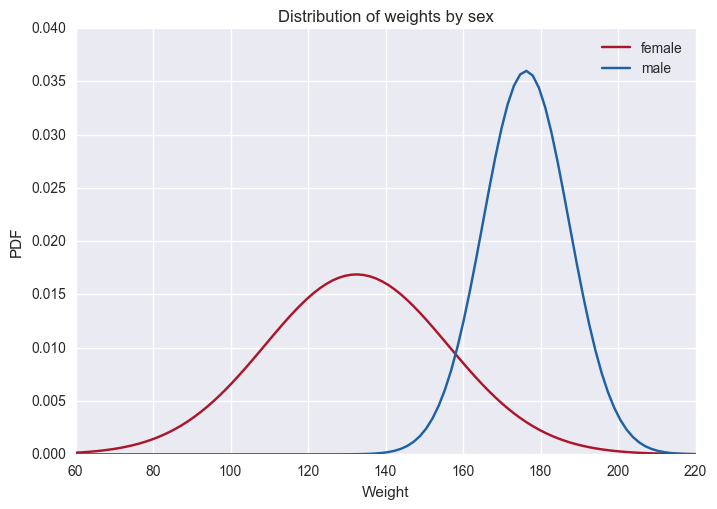

In [17]:
colors = sns.color_palette("RdBu", 10)
weights = np.linspace(60, 220, 100)
plt.plot(weights, females_weight_dist.pdf(weights), label='female', color=colors[0])
plt.plot(weights, males_weight_dist.pdf(weights), label='male', color=colors[-1])
plt.xlabel('Weight')
plt.ylabel('PDF')
plt.title('Distribution of weights by sex')
plt.legend()
plt.show()

#### Shoe size

In [18]:
males_size = people.loc[mask_male, 'size']
males_size_dist = norm(loc=males_size.mean(), scale=males_size.std())

In [19]:
females_size = people.loc[mask_female, 'size']
females_size_dist = norm(loc=females_size.mean(), scale=females_size.std())

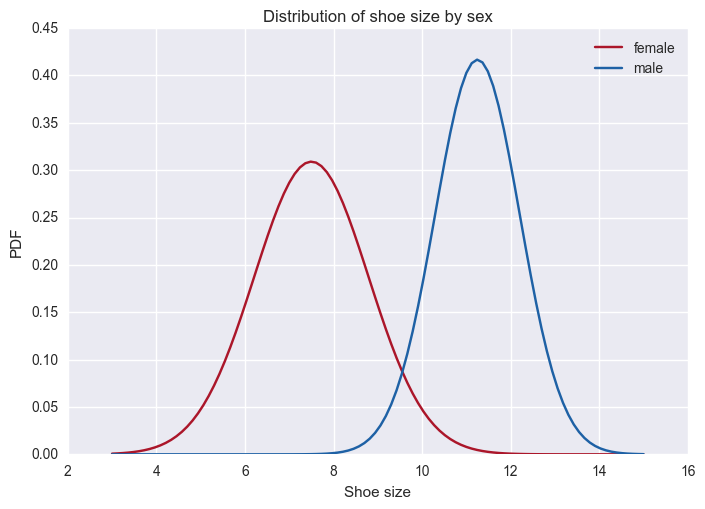

In [20]:
colors = sns.color_palette("RdBu", 10)
sizes = np.linspace(3, 15, 100)
plt.plot(sizes, females_size_dist.pdf(sizes), label='female', color= colors[0])
plt.plot(sizes, males_size_dist.pdf(sizes), label='male', color= colors[-1])
plt.xlabel('Shoe size')
plt.ylabel('PDF')
plt.title('Distribution of shoe size by sex')
plt.legend()
plt.show()

#### Predicting

In [21]:
person = namedtuple('person', ['height', 'weight', 'size'])

def male(person):
    likelihood = males_height_dist.pdf(person.height) * \
                 males_weight_dist.pdf(person.weight) * \
                 males_size_dist.pdf(person.size)
    prior = prob_male
    return likelihood * prior

def female(person):
    likelihood = females_height_dist.pdf(person.height) * \
                 females_weight_dist.pdf(person.weight) * \
                 females_size_dist.pdf(person.size)
    prior = prob_female
    return likelihood * prior

In [22]:
mary = person(5.68, 120, 7.5)
mary_male, mary_female = male(mary), female(mary)
mary_total = mary_male + mary_female
print("The probability of Mary be a male is:", mary_male/mary_total)
print("The probability of Mary be a female is:", mary_female/mary_total)

The probability of Mary be a male is: 6.08156647241e-09
The probability of Mary be a female is: 0.999999993918


In [23]:
john = person(7, 200, 14)
john_male, john_female = male(john), female(john)
john_total = john_male + john_female
print("The probability of John be a male is:", john_male/john_total)
print("The probability of John be a female is:", john_female/john_total)

The probability of John be a male is: 0.99769312609
The probability of John be a female is: 0.00230687391037


As expected after inspecting the data, our model gives more probability for Mary to be female and more probability for John to be male.